In [1]:
# [Input Vars]
#   1. <string> PATH_TO_DESIRED_LOCATION: It should be the directory containing (1) images/ (2) train.txt (3) test.txt (4) val.txt

# [Output Vars]
#   1. <ndarray> np_train_txt: It contains both the directory to a specific image and the related label.
#   2. <ndarray> np_test_txt: It contains both the directory to a specific image and the related label.
#   3. <ndarray> np_val_txt: It contains both the directory to a specific image and the related label.
import pandas as pd
import numpy as np
def read_metadata_files(Root_Path):
    # train.txt
    train_txt = pd.read_csv(Root_Path+"train.txt", sep=" ")
    NP_TRAIN_TXT = np.array(train_txt)
    
    # test.txt
    test_txt = pd.read_csv(Root_Path+"test.txt", sep=" ")
    NP_TEST_TXT = np.array(test_txt)
    
    # val.txt
    val_txt = pd.read_csv(Root_Path+"val.txt", sep=" ")
    NP_VAL_TXT = np.array(val_txt)
    
    print(f"[Check] There are {NP_TRAIN_TXT.shape[0]} pairs in train.txt.")
    print(f"[Check] There are {NP_TEST_TXT.shape[0]} pairs in test.txt.")
    print(f"[Check] There are {NP_VAL_TXT.shape[0]} pairs in val.txt.\n")
    
    return NP_TRAIN_TXT, NP_TEST_TXT, NP_VAL_TXT, len(NP_TRAIN_TXT), len(NP_TEST_TXT), len(NP_VAL_TXT)

Root_Path = "C:/Users/USER/Desktop/Projects/Github_Repo/AI/DeepLearning/__HW1_DATA/"
train_meta, test_meta, val_meta, len_train_meta, len_test_meta, len_val_meta = read_metadata_files(Root_Path)
print(f"The shape of test_meta is {test_meta.shape}")
print(f"The path of 1st example in test_meta is {test_meta[0][0]}")
print(f"The label of 1st example in test_meta is {test_meta[0][1]}")

[Check] There are 63324 pairs in train.txt.
[Check] There are 449 pairs in test.txt.
[Check] There are 449 pairs in val.txt.

The shape of test_meta is (449, 2)
The path of 1st example in test_meta is images/n02111277/n02111277_9422.JPEG
The label of 1st example in test_meta is 0


In [61]:
from tqdm import tqdm
import cv2 as cv
import numpy as np

#len_dataset = len_test_meta
#dataset = test_meta
#(height, width) = (28, 28)

def load_dataset(len_dataset, dataset, height, width):
    img_dataset = np.zeros((len_dataset, height, width, 3))
    img_label = np.zeros(len_dataset)

    for i in tqdm(range(len_dataset)):
        # 取 label
        img_label[i] = int(dataset[i][1])
        # 取 input
        img = cv.imread(Root_Path + dataset[i][0])
        img_resize = cv.resize(img, (height, width))
        
    
        # 把 img 放入 dataset
        img_dataset[i] = img_resize/255.
    return img_dataset, img_label

# read the dataset with load func

train_image_2, train_label_2 = load_dataset(len_train_meta, train_meta, 30, 30)
test_image_2, test_label_2 = load_dataset(len_test_meta, test_meta, 30, 30)
val_image_2, val_label_2 = load_dataset(len_val_meta, val_meta, 30, 30)

100%|███████████████████████████████████████████████████████████████████████████████| 449/449 [00:01<00:00, 301.85it/s]


In [18]:
from tqdm import tqdm
import numpy as np

train_label = np.zeros((len(train_label_2), 50))

for i in tqdm(range(len(train_label_2))):
    tmp = np.zeros(50)
    tmp[int(train_label_2[i])] = 1
    train_label[i] = tmp

test_label = np.zeros((len(test_label_2), 50))

for i in tqdm(range(len(test_label_2))):
    tmp = np.zeros(50)
    tmp[int(test_label_2[i])] = 1
    test_label[i] = tmp
    
val_label = np.zeros((len(val_label_2), 50))

for i in tqdm(range(len(val_label_2))):
    tmp = np.zeros(50)
    tmp[int(val_label_2[i])] = 1
    val_label[i] = tmp

100%|████████████████████████████████████████████████████████████████████████████| 449/449 [00:00<00:00, 149665.62it/s]


In [64]:
from keras import backend
backend.clear_session()

# Build a Simple Convolutional Neural Network with Keras
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(6, 3,input_shape=(30,30,3), padding="valid", activation='relu') )
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(16, 3, padding="valid", activation="relu"))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(120, 6, padding="valid", activation="relu"))
model.add(layers.Flatten()) # expected 120
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(50, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         168       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        880       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         69240     
_________________________________________________________________
flatten (Flatten)            (None, 120)               0         
_________________________________________________________________
dense (Dense)                (None, 84)                1

In [65]:
from keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])

In [66]:
train_image_2.shape
train_label.shape

(63324, 50)

In [67]:
history = model.fit(train_image_2, train_label, validation_data=(val_image_2,val_label), batch_size=50, epochs=10)

Epoch 1/10
1267/1267 [==============================] - 24s 19ms/step - loss: 3.4658 - acc: 0.1041 - val_loss: 3.2664 - val_acc: 0.1269
Epoch 2/10
1267/1267 [==============================] - 19s 15ms/step - loss: 3.1476 - acc: 0.1643 - val_loss: 3.1374 - val_acc: 0.1381
Epoch 3/10
1267/1267 [==============================] - 19s 15ms/step - loss: 3.0206 - acc: 0.1907 - val_loss: 3.0477 - val_acc: 0.1670
Epoch 4/10
1267/1267 [==============================] - 22s 17ms/step - loss: 2.9343 - acc: 0.2080 - val_loss: 3.4672 - val_acc: 0.1180
Epoch 5/10
1267/1267 [==============================] - 19s 15ms/step - loss: 2.8685 - acc: 0.2246 - val_loss: 2.9577 - val_acc: 0.1737
Epoch 6/10
1267/1267 [==============================] - 20s 15ms/step - loss: 2.8162 - acc: 0.2354 - val_loss: 2.9137 - val_acc: 0.1826
Epoch 7/10
1267/1267 [==============================] - 22s 17ms/step - loss: 2.7709 - acc: 0.2449 - val_loss: 2.8747 - val_acc: 0.2094
Epoch 8/10
1267/1267 [==========================

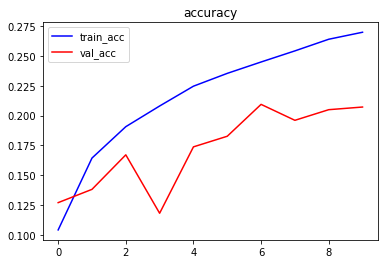

<Figure size 432x288 with 0 Axes>

In [69]:
import matplotlib.pyplot as plt

def plot_accuracy(history, miny=None):
    acc = history.history['acc']
    test_acc = history.history['val_acc']
    epochs = range(len(acc))
    plt.plot(epochs, acc, c = "b", label='train_acc')
    plt.plot(epochs, test_acc, c = "r" ,label='val_acc')
    plt.legend(loc="upper left")

    plt.title('accuracy') 
    plt.figure()
    plt.show()
    
plot_accuracy(history)

In [70]:
preds = model.predict(test_image_2)
pred_ans = np.argmax(preds, axis=1)

print(test_label_2)
print(pred_ans)

counter = 0
for i in range(len(pred_ans)):
    if test_label_2[i] == pred_ans[i]:
        counter = counter + 1
        
print(counter)
print(round(counter/len(pred_ans)*100,2))

[ 0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  2.
  2.  2.  2.  2.  2.  2.  2.  2.  3.  3.  3.  3.  3.  3.  3.  3.  3.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  5.  5.  5.  5.  5.  5.  5.  5.  5.  6.
  6.  6.  6.  6.  6.  6.  6.  6.  7.  7.  7.  7.  7.  7.  7.  7.  7.  8.
  8.  8.  8.  8.  8.  8.  8.  8.  9.  9.  9.  9.  9.  9.  9.  9.  9. 10.
 10. 10. 10. 10. 10. 10. 10. 10. 11. 11. 11. 11. 11. 11. 11. 11. 11. 12.
 12. 12. 12. 12. 12. 12. 12. 12. 13. 13. 13. 13. 13. 13. 13. 13. 13. 14.
 14. 14. 14. 14. 14. 14. 14. 14. 15. 15. 15. 15. 15. 15. 15. 15. 15. 16.
 16. 16. 16. 16. 16. 16. 16. 16. 17. 17. 17. 17. 17. 17. 17. 17. 17. 18.
 18. 18. 18. 18. 18. 18. 18. 18. 19. 19. 19. 19. 19. 19. 19. 19. 19. 20.
 20. 20. 20. 20. 20. 20. 20. 20. 21. 21. 21. 21. 21. 21. 21. 21. 21. 22.
 22. 22. 22. 22. 22. 22. 22. 22. 23. 23. 23. 23. 23. 23. 23. 23. 23. 24.
 24. 24. 24. 24. 24. 24. 24. 24. 25. 25. 25. 25. 25. 25. 25. 25. 25. 26.
 26. 26. 26. 26. 26. 26. 26. 26. 27. 27. 27. 27. 27